In [ ]:
'''
Lung & Colon Cancer Image Classification - CNN Model

- Type: Colon
- Classes: 2 (benign, adenocarcinoma)
- Num Epochs: 15
- Purpose: Test Effect on Final Accuracy after Image Augmentation on Validation Set 
'''

In [1]:
import os
import random
import tensorflow as tf

In [2]:
TRAIN_PATH = "colonTrain-paper"
VALID_PATH = "colonValid-paper"
TEST_PATH = "colonTest-paper"

In [3]:
image_data = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
    )

In [4]:
image_data1 = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
    )

In [ ]:
# Training Set: Augmented
# Validation + Test Set: Rescaled (not full augmentation)
# Accuracy: 81%

In [5]:
img_size = 150
batch_size = 32

train = image_data.flow_from_directory(TRAIN_PATH, target_size=(img_size,img_size), 
                                       batch_size=batch_size, color_mode='rgb', shuffle = True)

val = image_data1.flow_from_directory(VALID_PATH, target_size=(img_size,img_size), 
                                     batch_size=batch_size, color_mode='rgb', shuffle = True)

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(2)
    ])

In [7]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [8]:
history = model.fit(train, epochs=15, verbose = 1, validation_data=val)

Epoch 1/15
250/250 [==============================] - 138s 548ms/step - loss: 0.6025 - accuracy: 0.6578 - val_loss: 0.5049 - val_accuracy: 0.7680
Epoch 2/15
250/250 [==============================] - 138s 551ms/step - loss: 0.5110 - accuracy: 0.7552 - val_loss: 0.5217 - val_accuracy: 0.7320
Epoch 3/15
250/250 [==============================] - 146s 585ms/step - loss: 0.4690 - accuracy: 0.7746 - val_loss: 0.4331 - val_accuracy: 0.7950
Epoch 4/15
250/250 [==============================] - 139s 557ms/step - loss: 0.4253 - accuracy: 0.7969 - val_loss: 0.5019 - val_accuracy: 0.7730
Epoch 5/15
250/250 [==============================] - 139s 556ms/step - loss: 0.3912 - accuracy: 0.8224 - val_loss: 0.3256 - val_accuracy: 0.8520
Epoch 6/15
250/250 [==============================] - 139s 554ms/step - loss: 0.3594 - accuracy: 0.8425 - val_loss: 0.5566 - val_accuracy: 0.7650
Epoch 7/15
250/250 [==============================] - 135s 541ms/step - loss: 0.3279 - accuracy: 0.8631 - val_loss: 0.4368 -

In [9]:
test = image_data1.flow_from_directory(TEST_PATH, target_size=(img_size,img_size), 
                                     batch_size=1, color_mode='rgb', shuffle = True)

Found 1000 images belonging to 2 classes.


In [10]:
acc = model.evaluate(test)
print(f'The test set accuracy is {acc}\%.')

1000/1000 [==============================] - 12s 12ms/step - loss: 0.5087 - accuracy: 0.8090
The test set accuracy is [0.5086672306060791, 0.8090000152587891]\%.


In [ ]:
# Training + Testing: Full Augmentation

In [11]:
test1 = image_data.flow_from_directory(TEST_PATH, target_size=(img_size,img_size), 
                                     batch_size=1, color_mode='rgb', shuffle = True)

Found 1000 images belonging to 2 classes.


In [12]:
acc = model.evaluate(test1)
print(f'The test set accuracy is {acc}\%.')

1000/1000 [==============================] - 13s 13ms/step - loss: 0.0790 - accuracy: 0.9700
The test set accuracy is [0.07900301367044449, 0.9700000286102295]\%.


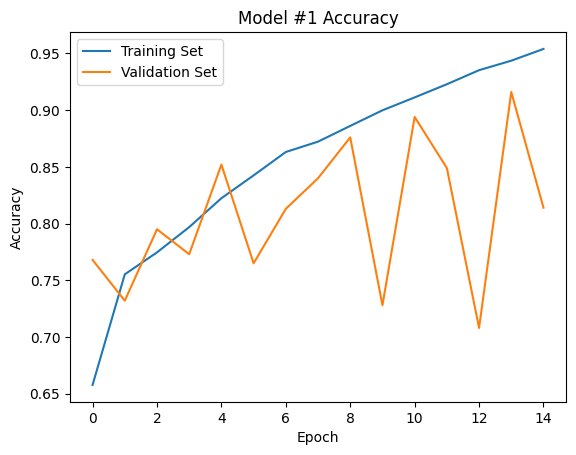

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img

plt.title('Model #1 Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'], loc='upper left')

plt.show()

In [ ]:
# end of this code

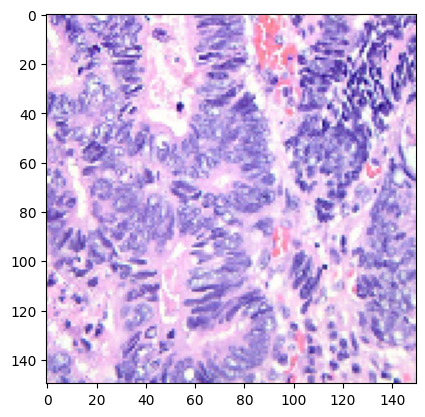

[[1. 0.]]
1/1 [==============================] - 0s 104ms/step
[[ 1.4037308 -1.258295 ]]


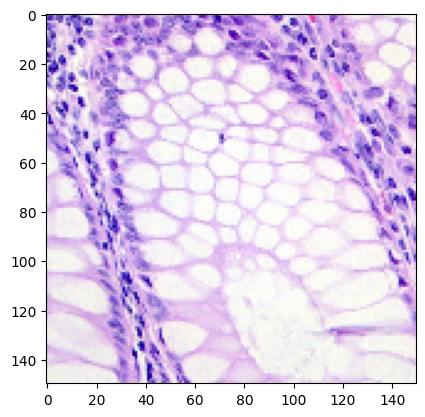

[[0. 1.]]
1/1 [==============================] - 0s 34ms/step
[[-1.88907    1.6786969]]


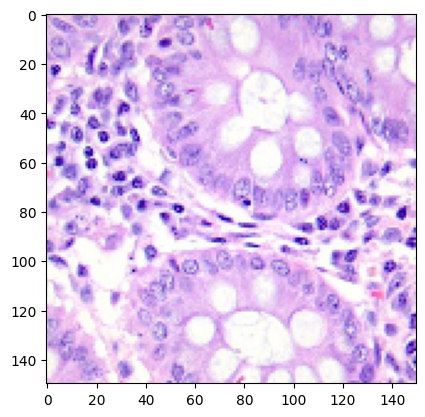

[[0. 1.]]
1/1 [==============================] - 0s 36ms/step
[[-1.5982933  1.5354819]]


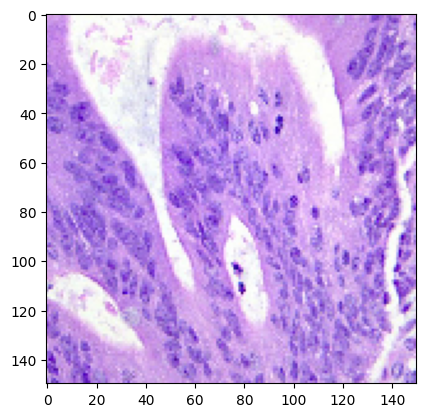

[[1. 0.]]
1/1 [==============================] - 0s 33ms/step
[[ 2.5773213 -1.9595456]]


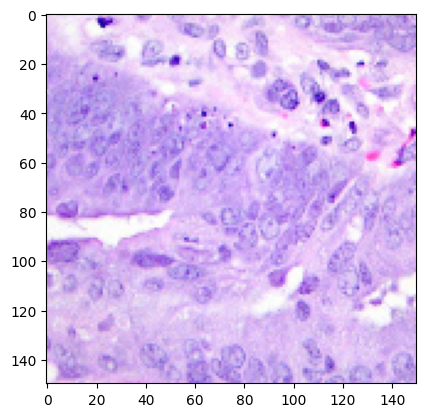

[[1. 0.]]
1/1 [==============================] - 0s 37ms/step
[[ 4.6037245 -4.1665936]]


In [74]:
for _ in range(5):
    img, label = test1.next()
    plt.imshow(img[0])
    plt.show()
    print(str(label))
    print(model.predict(img))

In [75]:
# model w/o image augmentation
image_data2 = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
    )

In [77]:
img_size = 150
batch_size = 32

train1 = image_data2.flow_from_directory(TRAIN_PATH, target_size=(img_size,img_size),
                                         batch_size=batch_size, color_mode='rgb')

val1 = image_data2.flow_from_directory(VALID_PATH, target_size=(img_size,img_size), 
                                        batch_size=batch_size,
                                        color_mode='rgb')

Found 8000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [78]:
model1 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(2)
    ])

In [80]:
model1.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [81]:
history2 = model1.fit(train1, epochs=15, validation_data=val1)

Epoch 1/15
250/250 [==============================] - 122s 483ms/step - loss: 0.6563 - accuracy: 0.6136 - val_loss: 0.5374 - val_accuracy: 0.7960
Epoch 2/15
250/250 [==============================] - 122s 487ms/step - loss: 0.5557 - accuracy: 0.7194 - val_loss: 0.4374 - val_accuracy: 0.8290
Epoch 3/15
250/250 [==============================] - 120s 480ms/step - loss: 0.5002 - accuracy: 0.7567 - val_loss: 0.5536 - val_accuracy: 0.7090
Epoch 4/15
250/250 [==============================] - 119s 478ms/step - loss: 0.4382 - accuracy: 0.7954 - val_loss: 0.3389 - val_accuracy: 0.8560
Epoch 5/15
250/250 [==============================] - 119s 474ms/step - loss: 0.4118 - accuracy: 0.8188 - val_loss: 0.3292 - val_accuracy: 0.8710
Epoch 6/15
250/250 [==============================] - 121s 485ms/step - loss: 0.3642 - accuracy: 0.8381 - val_loss: 0.5413 - val_accuracy: 0.7120
Epoch 7/15
250/250 [==============================] - 121s 485ms/step - loss: 0.3329 - accuracy: 0.8570 - val_loss: 0.2710 -

In [82]:
testA = image_data2.flow_from_directory(TEST_PATH, target_size=(img_size,img_size), 
                                        batch_size=batch_size,
                                        color_mode='rgb')

Found 1000 images belonging to 2 classes.


In [83]:
accA = model1.evaluate(testA)
print(f'The flow from directory test set accuracy is {accA[1]}\%.')

32/32 [==============================] - 5s 147ms/step - loss: 0.1199 - accuracy: 0.9570
The flow from directory test set accuracy is 0.9570000171661377\%.


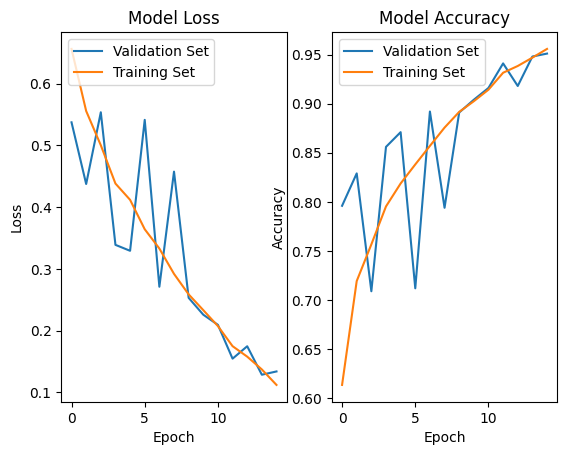

In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# display results
plt.subplot(1, 2, 1)
plt.title('Model Loss')
plt.plot(history2.history['val_loss'])
plt.plot(history2.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation Set','Training Set'], loc='upper left')

plt.subplot(1, 2, 2)
plt.title('Model Accuracy')
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation Set','Training Set'], loc='upper left')

plt.show()